<h2> Sentiment Analysis </h2> (Entity Based)

### Problem Statement
#### This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

### Steps for sentimental analysis include:
<h5> 
1.Preprocessing: Clean and normalize text, tokenize, remove stopwords, and lemmatize.<br>
2.Feature Engineering: Identify entities, use TF-IDF or embeddings for representation.<br>
3.Model Training: Split data, select and train models (e.g., SVM, LSTM).<br>
4.Evaluation: Assess model using accuracy, precision, recall, F1-score.<br>
5.Prediction: Predict sentiment for new data.<br>
6.Visualization: Use charts and plots to display sentiment trends.</h5>

### Now let's begin implementing these steps on the Twitter dataset

In [15]:
pip install spacy

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.4/488.4 kB 5.9 MB/s e

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

In [19]:
import pandas as pd
import re
import spacy
from spacy.cli import download as spacy_download
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
spacy_download('en_core_web_sm')

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


In [21]:
nlp = spacy.load('en_core_web_sm')

In [22]:
column_names = ['entity', 'sentiment', 'tweet']
df = pd.read_csv("/Users/ambigaur/Desktop/Ambi_coding/python/Prasunet_DS/twitter_training.csv", names = column_names, header=0)

In [23]:
df.head()

,entity,sentiment,tweet
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [24]:
def preprocess_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = tweet.lower()
    tweet = re.sub('[^\w\s]', '', tweet)
    doc = nlp(tweet)
    lemmatized_words = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(lemmatized_words)


In [ ]:
"""def preprocess_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = tweet.lower()
    tweet = re.sub('[^\w\s]', '', tweet)
    tweet_tokens = nltk.word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)"""

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74681 entries, 2401 to 9200
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entity     74681 non-null  object
 1   sentiment  74681 non-null  object
 2   tweet      73995 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [29]:
df['tweet'] = df['tweet'].astype(str)


In [32]:
df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet)

In [33]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_tweet'])

In [34]:
y = df['sentiment']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [38]:
y_preds= model.predict(X_test)
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_preds)

0.6840731070496083

In [40]:
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n  Irrelevant       0.66      0.55      0.60      2661\n    Negative       0.73      0.76      0.74      4471\n     Neutral       0.61      0.65      0.63      3551\n    Positive       0.71      0.71      0.71      4254\n\n    accuracy                           0.68     14937\n   macro avg       0.68      0.67      0.67     14937\nweighted avg       0.68      0.68      0.68     14937\n'

In [41]:
confusion_matrix(y_test, y_preds)

array([[1467,  381,  379,  434],
       [ 230, 3398,  504,  339],
       [ 262,  495, 2313,  481],
       [ 250,  392,  572, 3040]])

### VISUALISATION

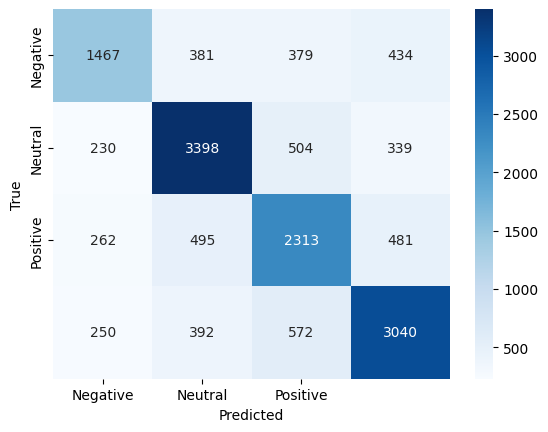

: 

In [43]:
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()